In [1]:
# import the necessary packages

import os
import json
import time
import folium
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#ignore warnings
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)

# Gather the Data


Columns :
Nombre de bornes disponibles : nbfreeedock (int)  
Nombre vélo en PARK+ : nbbikeoverflow (int)  
Nombres de bornes en station : nbedock (int)  
PARK + activation : overflowactivation (str)  
etc ...  

voir Modèle de données sur https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/information/


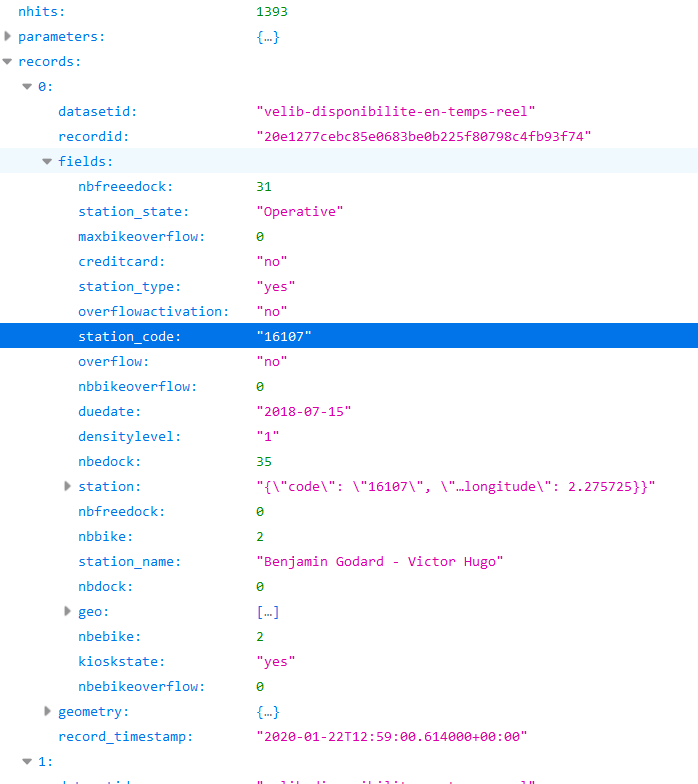

In [3]:
from IPython.display import Image
Image(filename='datajson.png')

In [13]:
%%time

# set the endpoint API URL
url = "https://opendata.paris.fr/api/records/1.0/search/?dataset=velib-disponibilite-en-temps-reel&lang=fr&rows=-1"

# make the call
resp = requests.get(url)

#grab the results returned in json format
data = resp.json()

# Track request_time for comparison with record_timestamp
request_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())


col = ['nbfreeedock',
    'station_state',
    'creditcard',
    'overflowactivation',
    'station_code',
    'nbedock',
    'nbebike',
    'nbbike',
    'station_name',
    'nbbikeoverflow',
    'geo',
    'kioskstate',
    'request_time',
    'record_timestamp',
    'recordid']


# Initialize the dataframe 
df = pd.DataFrame(columns=col)

nb_stations = data['nhits']
print("[INFO] Numbers of stations :", nb_stations)

# loop over the stations
for i in range(nb_stations):

    # Add all the values from the fields key and 3 other relevants informations
    df.loc[len(df)] = list(data['records'][i]['fields'].values()) + [request_time, data['records'][i]['record_timestamp'], data['records'][i]['recordid']]
    

# Not very optimize, maybe there is a better index and a better way to do it
df.set_index('recordid', inplace=True)

print("[INFO] Done.")

[INFO] Numbers of stations : 1398
[INFO] Done.
Wall time: 15.7 s


In [14]:
df.head()

,nbfreeedock,station_state,creditcard,overflowactivation,station_code,nbedock,nbebike,nbbike,station_name,nbbikeoverflow,geo,kioskstate,request_time,record_timestamp
recordid,,,,,,,,,,,,,,
b44528ec2765a571723a53294cca9c10c0d6f42d,35,Operative,no,no,16107,35,0,0,Benjamin Godard - Victor Hugo,0,"[48.865983, 2.275725]",yes,2020-02-06 17:20:07,2020-02-06T16:19:02.334000+00:00
617d5a30a966bb3823b6bc2a64b52bebbbe67d11,37,Operative,yes,no,6015,52,5,10,André Mazet - Saint-André des Arts,0,"[48.85375581057431, 2.3390958085656166]",yes,2020-02-06 17:20:07,2020-02-06T16:19:02.334000+00:00
4a25ee59a03573ec4bc9260cff5342c93d807602,19,Operative,no,no,11104,20,1,0,Charonne - Robert et Sonia Delauney,0,"[48.85590755596891, 2.3925706744194035]",yes,2020-02-06 17:20:07,2020-02-06T16:19:02.334000+00:00
461c9968e53b7039d7b4903bdfa02968a4a9fa98,19,Operative,yes,no,9020,21,1,1,Toudouze - Clauzel,0,"[48.87929591733507, 2.3373600840568547]",yes,2020-02-06 17:20:07,2020-02-06T16:19:02.334000+00:00
19f92613209e17479b8ac0705ffcc3f52686ff3b,26,Operative,no,no,12109,30,2,2,Mairie du 12ème,0,"[48.84085531176338, 2.3875549435615544]",yes,2020-02-06 17:20:07,2020-02-06T16:19:02.334000+00:00


In [7]:
df.tail()

,nbfreeedock,station_state,creditcard,overflowactivation,station_code,nbbikeoverflow,nbedock,nbbike,station_name,geo,nbebike,kioskstate,request_time,record_timestamp
recordid,,,,,,,,,,,,,,
135c0a9f9d6172b6b13bd0a35c65e2b3a3184ff4,17,Operative,yes,no,6009,36,8,10,Guynemer - Jardin du Luxembourg,0,"[48.8466127, 2.3325478]",yes,2020-02-06 17:13:53,2020-02-06T16:13:00.513000+00:00
ebf6ee210c065bb2ff4f05f873580b68b66a214e,0,Work in progress,no,no,26002,0,0,0,Redoute - Les Courtilles,0,"[48.930029744661994, 2.284012341551716]",no,2020-02-06 17:13:53,2020-02-06T16:13:00.513000+00:00
8cdba8aaf6a38e4bb431fcba682f04b3c6aaf82a,0,Work in progress,no,no,26003,0,0,0,Argenteuil - Voltaire,0,"[48.91872206998632, 2.281437367200852]",no,2020-02-06 17:13:53,2020-02-06T16:13:00.513000+00:00
fa1d1e5470689ff1bd79f02793fad9384483aca6,0,Work in progress,no,no,15201,0,0,0,Porte de la plaine - Lefebvre,0,"[48.83061737745046, 2.2920634208276174]",no,2020-02-06 17:13:53,2020-02-06T16:13:00.513000+00:00
161e2f3ea1042bf44b19a4c27c9e666ca4bb6bd0,0,Work in progress,no,no,42706,0,0,0,Redoute - Pierre de Coubertin,0,"[48.81465708183031, 2.3612006310577276]",no,2020-02-06 17:13:53,2020-02-06T16:13:00.513000+00:00


In [8]:
print('The data has {} Rows and {} columns'.format(df.shape[0],df.shape[1]))

The data has 1398 Rows and 14 columns


In [9]:
print("The types of columns are:")
df.dtypes

The types of columns are:


nbfreeedock           object
station_state         object
creditcard            object
overflowactivation    object
station_code          object
nbbikeoverflow        object
nbedock               object
nbbike                object
station_name          object
geo                   object
nbebike               object
kioskstate            object
request_time          object
record_timestamp      object
dtype: object

In [10]:
# converting datatypes 
df = df.infer_objects()
df['record_timestamp'] = pd.to_datetime(df['record_timestamp'], infer_datetime_format=True)
df['request_time'] = pd.to_datetime(df['request_time'], format="%Y-%m-%d %H:%M:%S")
df.dtypes

nbfreeedock                         int64
station_state                      object
creditcard                         object
overflowactivation                 object
station_code                       object
nbbikeoverflow                      int64
nbedock                             int64
nbbike                              int64
station_name                       object
geo                                 int64
nbebike                            object
kioskstate                         object
request_time               datetime64[ns]
record_timestamp      datetime64[ns, UTC]
dtype: object

### Extract Descriptive Statistics of Each Column

In [12]:
def num_missing(x):
    return len(x.index)-x.count()

def num_unique(x):
    return len(np.unique(x))

temp_df = df.describe().T
missing_df = pd.DataFrame(df.apply(num_missing, axis=0)) 
missing_df.columns = ['missing']
unq_df = pd.DataFrame(df.apply(num_unique, axis=0))
unq_df.columns = ['unique']
types_df = pd.DataFrame(df.dtypes)
types_df.columns = ['DataType']

In [13]:
# Print the descriptive statistics of numerical columns
summary_df = temp_df.join(missing_df).join(unq_df).join(types_df)
summary_df

,count,mean,std,min,25%,50%,75%,max,missing,unique,DataType
nbfreeedock,1394.0,20.622669,14.436422,0.0,11.0,20.0,30.0,67.0,0,66,int64
maxbikeoverflow,1394.0,16.177188,18.322689,0.0,0.0,10.0,30.0,71.0,0,63,int64
nbbikeoverflow,1394.0,0.037303,0.365470,0.0,0.0,0.0,0.0,12.0,0,4,int64
nbedock,1394.0,25.547346,15.817729,0.0,18.0,25.0,35.0,73.0,0,70,int64
nbfreedock,1394.0,4.406743,10.669020,0.0,0.0,0.0,0.0,58.0,0,55,int64
nbbike,1394.0,3.095409,4.466218,0.0,0.0,2.0,4.0,43.0,0,29,int64
nbdock,1394.0,5.477044,12.887936,0.0,0.0,0.0,0.0,70.0,0,57,int64
nbebike,1394.0,2.512912,2.698045,0.0,1.0,2.0,3.0,18.0,0,18,int64
nbebikeoverflow,1394.0,0.007174,0.092536,0.0,0.0,0.0,0.0,2.0,0,3,int64


In [14]:
# Print the descriptive statistics of categorical columns

cat_index = ['station_state', 'creditcard', 'station_type', 'overflowactivation', 'station_code', 'overflow', 'densitylevel', 'station_name', 'kioskstate']

summary_df_cat = missing_df.join(unq_df).join(types_df.loc[cat_index], how='inner') #Only summarize categorical columns
summary_df_cat

,missing,unique,DataType
station_state,0,3,object
creditcard,0,2,object
station_type,0,2,object
overflowactivation,0,1,object
station_code,0,1394,object
overflow,0,2,object
densitylevel,0,2,object
station_name,0,1389,object
kioskstate,0,2,object


In [15]:
# pandas profiling is an amazing tool 
import pandas_profiling

profile = pandas_profiling.ProfileReport(df)
profile.to_file(output_file="report_velib.html")

In [17]:
# uncomment if you are in a web notebook
# profile

### EDA
Thanks to pandas profiling, we can see that there is 1327 station operative, 41 work in progress and 26 close.

In [11]:
velib_op = df[df['station_state']=='Operative']

# Available bikes

In [19]:
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green").hex,10))
def red(brightness):
    brightness = int(round(9 * brightness)) # convert from 0.0-1.0 to 0-255
    return colors[brightness]

In [12]:
velib_op['lat'] = velib_op['geo'].apply(lambda x: float(x[0]))
velib_op['long'] = velib_op['geo'].apply(lambda x: float(x[1]))
velib_op['color'] = velib_op.apply(lambda x: red((x['nbbike']+x['nbebike'])/(x['nbedock'] + x['nbdock'])).hex, axis=1)

TypeError: 'int' object is not subscriptable

In [48]:
velib_op['dock_velib'] = velib_op.apply(lambda x: x['nbedock'] + x['nbdock'], axis=1)
velib_op['available_velib'] = velib_op.apply(lambda x: x['nbbike'] + x['nbebike'], axis=1)
velib_op['available_dock'] = velib_op.apply(lambda x: x['dock_velib'] - x['available_velib'], axis=1)

velib_op['ratio'] = velib_op.apply(lambda x: (x['nbbike']+x['nbebike'])/(x['nbedock'] + x['nbdock']), axis=1)

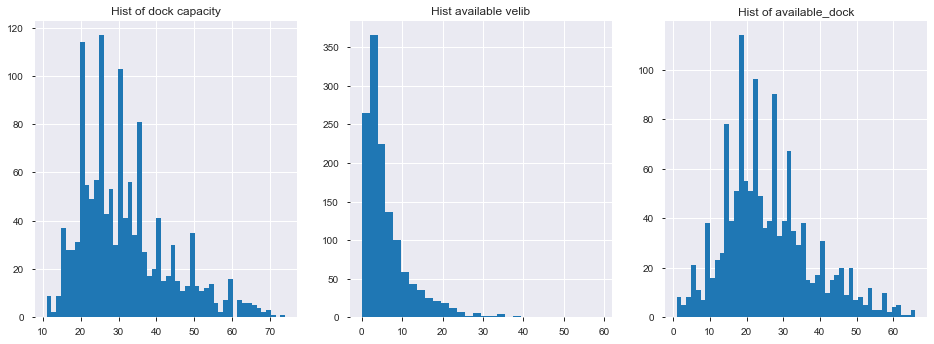

In [50]:
#graph distribution
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.hist(velib_op['dock_velib'], bins=50)
plt.title('Hist of dock capacity')

plt.subplot(232)
plt.hist(velib_op['available_velib'], bins=30)
plt.title('Hist available velib')

plt.subplot(233)
plt.hist(velib_op['available_dock'], bins=50)
plt.title('Hist of available_dock')

plt.show()

In [72]:
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster



callback = """\
function (row) {
    var icon, marker;
    icon = L.AwesomeMarkers.icon({
        icon: "map-marker", markerColor: "red"});
    marker = L.marker(new L.LatLng(row[0], row[1]));
    marker.setIcon(icon);
    return marker;
};
"""

m = folium.Map([48.85, 2.35], tiles='Cartodb Positron', zoom_start=11)

marker_cluster = MarkerCluster().add_to(m)

FastMarkerCluster(
    velib_op['geo'],
    callback=callback
).add_to(m)

m

In [74]:

m = folium.Map(
    location=[48.85, 2.35],
    tiles='Cartodb Positron',
    zoom_start=11
)

marker_cluster = MarkerCluster(
    name='1000 clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)

for k, v in velib_op.iterrows():
    location = v.geo[0], v.geo[1]
    marker = folium.Marker(location=location)
    popup = 'Station:{}<br>Number of Velibs:{}<br>Number of Docks:{}'.format(v.station_name, v.available_velib, v.available_dock)
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)

marker_cluster.add_to(m)

m

In [68]:
from folium.plugins import HeatMap

m = folium.Map([48.85, 2.35], tiles='Cartodb Positron', zoom_start=11)

HeatMap(
    velib_op[['lat','long', 'available_velib']].values
).add_to(m)

cm.LinearColormap(
    ['blue', 'green',  'yellow', 'orange', 'red'],
    index=np.linspace(0, 1, 5)
).scale(0, 350).add_to(m)

m